# Red Wine Quality Prediction

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')    #importing dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape  #checking the shape of dataframe

(1599, 12)

In [4]:
df.describe() #for satistical summary

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.isnull().sum()   #check for null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

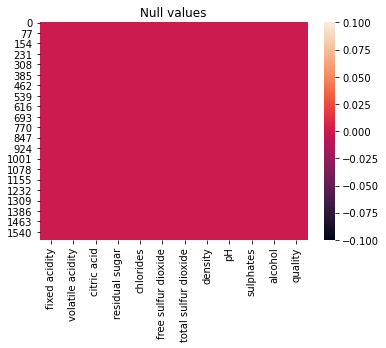

In [6]:
#generating heatmap of null values
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

In [7]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
#lets check for coreleation
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


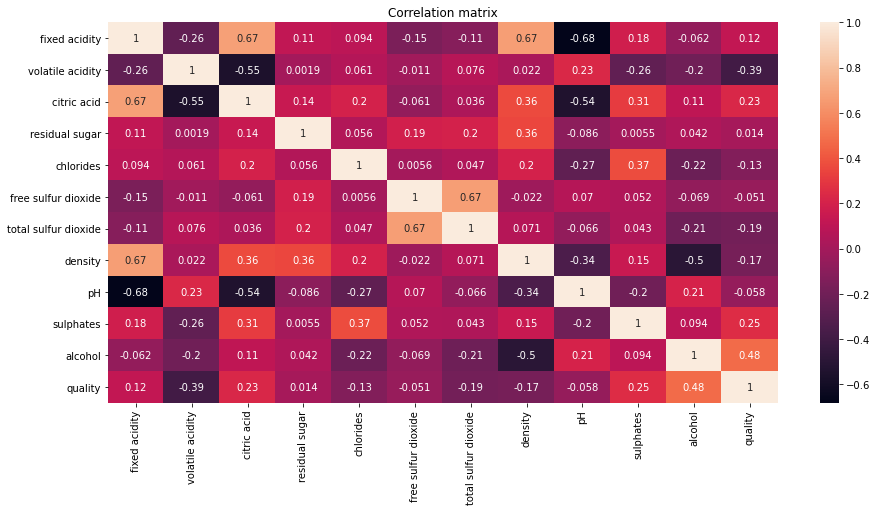

In [10]:
#Correleation heatmap
corr_mat=df.corr()
plt.figure(figsize=[15,7])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation matrix")
plt.show()

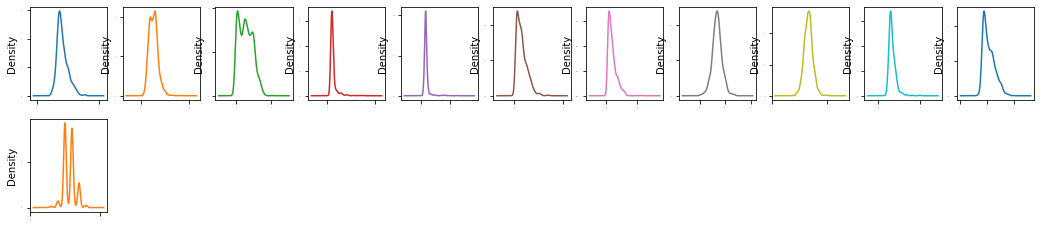

In [11]:
#Cheking data distribution of data
df.plot(kind="density", subplots=True,layout=(6,11), sharex=False, legend= False, fontsize=1, figsize=(18,12))
plt.show()

In [12]:
#Here skewness is present.
#splitting the independent and target variable columns into x and y to remove skewness.
x=df.drop("quality", axis = 1)
y=df["quality"]

In [14]:
#checking skewness
x.skew()    #here data is highly skewed
#considering the range of (-5,5)

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

In [15]:
#removing skewness using power transform method
from sklearn.preprocessing import power_transform
x_new = power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)
x.skew()  #validating if skewness is removed or not

fixed acidity           0.002529
volatile acidity        0.003099
citric acid             0.017788
residual sugar         -0.015715
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
density                -0.005054
pH                     -0.002823
sulphates               0.009985
alcohol                 0.112372
dtype: float64

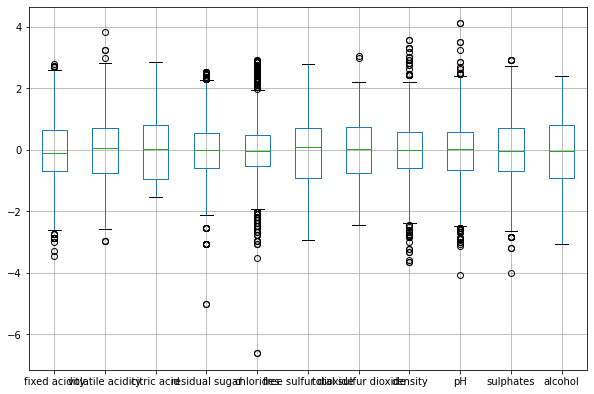

In [16]:
#above result shows skewness is removed
#now checking for outliers
x.iloc[:,0:].boxplot(figsize=[10,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [20]:
#here in all the columns outliers are near the wisk hence considering no outliers are present
#hence can proceed for Finding the best random state.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range (1,1000) :
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ("Best accuracy is",maxAccu,"on Random_state", maxRS)

Best accuracy is 0.665625 on Random_state 479


In [21]:
#Creating train test split at random state 479
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state=479)

#Logistic Regression

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print ("Accuracy",accuracy_score(y_test, predlr)*100)
print (confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

Accuracy 66.5625
[[  0   0   2   0   0   0]
 [  0   0   6   4   0   0]
 [  1   0 113  32   4   0]
 [  0   1  21  80  13   0]
 [  0   0   1  19  20   0]
 [  0   0   0   1   2   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.79      0.75      0.77       150
           6       0.59      0.70      0.64       115
           7       0.51      0.50      0.51        40
           8       0.00      0.00      0.00         3

    accuracy                           0.67       320
   macro avg       0.32      0.32      0.32       320
weighted avg       0.65      0.67      0.65       320



In [22]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Accuracy", accuracy_score(y_test, preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 59.06249999999999
[[ 0  0  0  2  0  0]
 [ 1  1  4  2  2  0]
 [ 2 10 94 39  5  0]
 [ 0  3 26 74 11  1]
 [ 0  1  4 12 20  3]
 [ 0  0  0  2  1  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.07      0.10      0.08        10
           5       0.73      0.63      0.68       150
           6       0.56      0.64      0.60       115
           7       0.51      0.50      0.51        40
           8       0.00      0.00      0.00         3

    accuracy                           0.59       320
   macro avg       0.31      0.31      0.31       320
weighted avg       0.61      0.59      0.60       320



In [23]:
#Random forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
print("Accuracy", accuracy_score(y_test, predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 69.375
[[  0   0   1   1   0   0]
 [  0   0   5   5   0   0]
 [  0   0 112  37   1   0]
 [  0   0  21  87   7   0]
 [  0   0   1  16  23   0]
 [  0   0   0   3   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.80      0.75      0.77       150
           6       0.58      0.76      0.66       115
           7       0.74      0.57      0.65        40
           8       0.00      0.00      0.00         3

    accuracy                           0.69       320
   macro avg       0.35      0.35      0.35       320
weighted avg       0.68      0.69      0.68       320



In [24]:
#SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
ad_pred= svc.predict(x_test)
print("Accuracy", accuracy_score(y_test, ad_pred)*100)
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

Accuracy 64.375
[[  0   0   1   1   0   0]
 [  0   0   7   3   0   0]
 [  0   0 114  34   2   0]
 [  0   0  32  77   6   0]
 [  0   0   1  24  15   0]
 [  0   0   0   2   1   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.74      0.76      0.75       150
           6       0.55      0.67      0.60       115
           7       0.62      0.38      0.47        40
           8       0.00      0.00      0.00         3

    accuracy                           0.64       320
   macro avg       0.32      0.30      0.30       320
weighted avg       0.62      0.64      0.63       320



In [25]:
#cross validation
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR,x,y,cv=5)
print("cross val score of logistic regression model:",scr.mean())

cross val score of logistic regression model: 0.5703879310344828


In [26]:
scr=cross_val_score(dt,x,y,cv=5)
print("cross val score of decision tree classifer:",scr.mean())

cross val score of decision tree classifer: 0.4752840909090909


In [27]:
scr=cross_val_score(rf,x,y,cv=5)
print("cross val score of random forest classifer:",scr.mean())

cross val score of random forest classifer: 0.5753722570532915


In [28]:
scr=cross_val_score(svc,x,y,cv=5)
print("cross val score of SVC:",scr.mean())

cross val score of SVC: 0.567862460815047


In [29]:
#considering cross val score of random forest classifer: 0.5753722570532915
#performing hyper parameter tuning

from sklearn.model_selection import GridSearchCV

# Creating parameter list to pass in GridSearchcv
parameters = {'max_features': ['auto', 'sqrt','log2'],
                               'max_depth': [4,5,6,7,8,9],
                               'criterion':['gini','entropu']}


GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train) # Fitting the data in model
GCV.best_params_ # Printing the best parameter found by GridSearchCV

{'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto'}

In [30]:
GCV_pred=GCV.best_estimator_.predict(x_test) # Predicting with best parameters
accuracy_score(y_test,GCV_pred) # Checking final accuracy

0.6875

The accuarcy is 68%

In [33]:
#saving the model in pickle format
import joblib
joblib.dump(GCV.best_estimator_,"practice_4.pkl")

['practice_4.pkl']